# <font color="gray"><center>Electronic Store Sales Analysis</center></font>

### **Table of Contents**


1.	[Data Exploration](#1)
2.	[Data Cleaning](#2)
    - [Handling missing values](#3)
    - [Identifing Outliers](#4)
    - [Data type Conversion](#5)
    - [Remove Duplicates values](#6)
1.	[Data Analysis](#7)

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings("ignore")

Read data from CSV files

In [3]:
dataset = "./data"
os.listdir(dataset)

['cleaned',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [7]:
files = os.listdir(dataset)

In [8]:
# Merge data
data = pd.DataFrame()

for file in files:
    temp = pd.read_csv("./data/" + file)
    data = pd.concat([data, temp])

## **1. Data Exploration** <a class="anchor" id="1"></a>

In [9]:
# Preview the dataset
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
# View the shape of data
data.shape

(186850, 6)

In [11]:
# columns
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [12]:
# View summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [13]:
# View summary statistic
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


Our dataset contains unexpected values (Order ID = "Order ID")

## **2. Data Cleaning** <a class="anchor" id="2"></a>

#### **Handling missing values** <a class="anchor" id="3"></a>

In [61]:
# Find missing value
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

<AxesSubplot:>

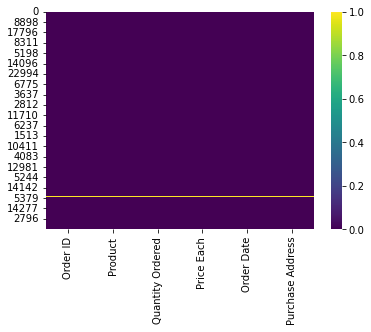

In [62]:
# Visualize missing value
sns.heatmap(data.isnull(), cmap='viridis')

In [14]:
# View missing vavlues
data[data.isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
11681,NaN,NaN,NaN,NaN,NaN,NaN
11682,NaN,NaN,NaN,NaN,NaN,NaN
11683,NaN,NaN,NaN,NaN,NaN,NaN
11684,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Drop missing value
data.dropna(inplace=True)

In [17]:
# Verification
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### **Identifying Outliers and Unexpected values** <a class="anchor" id="4"></a>

In [18]:
data.sort_values(by="Order ID", ascending=False).head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9549,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
8707,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
12037,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11989,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10309,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
# View unexpected values
data[data["Order ID"] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [20]:
# Drop unexpected values
data = data[data["Order ID"] != "Order ID"]

In [21]:
# Verification
data[data["Order ID"] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### **Data types Conversion** <a class="anchor" id="5"></a>

In [27]:
# View data types
data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [24]:
# convert to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [26]:
# convert to float
data['Price Each'] = pd.to_numeric(data["Price Each"]) 
# convert to int
data['Quantity Ordered'] = pd.to_numeric(data["Quantity Ordered"]) 

In [28]:
# Verification
data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

#### **Remove duplicates values** <a class="anchor" id="6"></a>

In [32]:
# Number of duplicated values
data.duplicated().sum()

264

In [33]:
# Drop duplicated values
data.drop_duplicates(inplace=True)

Save this cleaned data

In [80]:
data.to_csv('./data/cleaned/sales.csv', index=False)

## **3. Data Analysis** <a class="anchor" id="7"></a>

 #### 1. What was the best month for sales? How much was earned that month?

Let's add month column to our dataset

In [34]:
# get month from Order date
data["Month"] = data["Order Date"].dt.month_name()

In [82]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [35]:
# Sort data by order date
data = data.sort_values(by="Order Date", ascending=True).reset_index().drop(columns="index", axis=1)

In [86]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January


add Net Sales columns

In [36]:
data['Net Sales'] = data["Price Each"] * data['Quantity Ordered']

In [37]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Net Sales
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90


Group data by month and sort it

In [38]:
data.groupby('Month')['Net Sales'].sum().sort_values(ascending=False)

Month
December     4608295.70
October      3734777.86
April        3389217.98
November     3197875.05
May          3150616.23
March        2804973.35
July         2646461.32
June         2576280.15
August       2241083.37
February     2200078.08
September    2094465.69
January      1821413.16
Name: Net Sales, dtype: float64

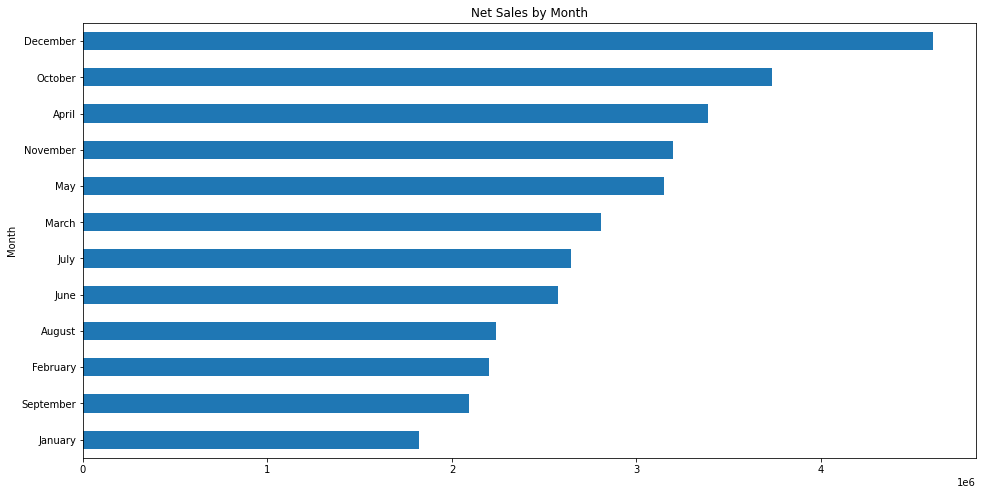

In [39]:
# Visualization
plt.figure(figsize=(16, 8))
data.groupby('Month')['Net Sales'].sum().sort_values(ascending=True).plot(kind="barh")
plt.title("Net Sales by Month")
plt.show()

> The best month in terms of sales was december, with a revenue of $4,608,295.

#### 2. Which city had the highest number of sales ?

In [40]:
# Get city from "Purchase Address" columns
def get_city(string):
    city = string.split(",")[1].strip()
    return city

data['City'] = data['Purchase Address'].apply(get_city)

In [46]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Net Sales,City,Hour
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6


In [42]:
data.groupby("City")['Net Sales'].count().sort_values(ascending=False)

City
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: Net Sales, dtype: int64

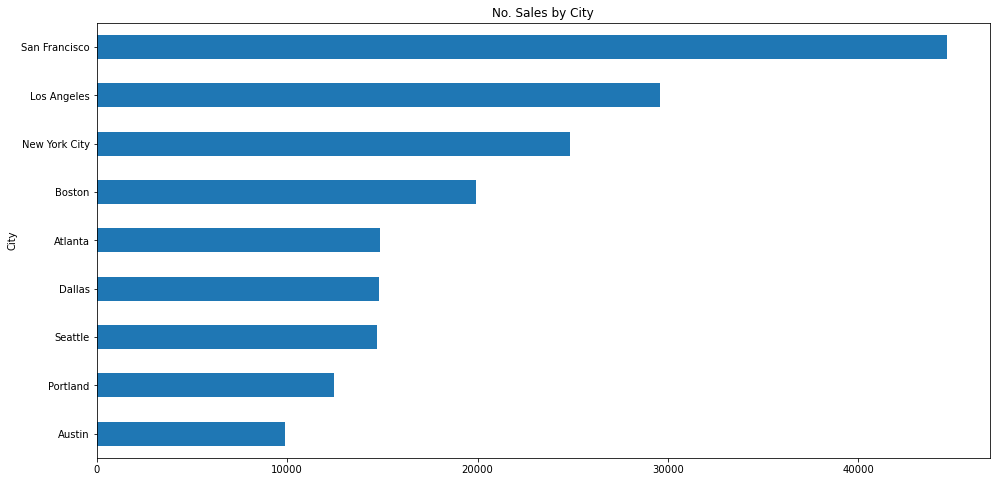

In [43]:
# Visualization
plt.figure(figsize=(16, 8))
data.groupby("City")['Net Sales'].count().sort_values().plot(kind="barh")
plt.title("No. Sales by City")
plt.show()

> San Francisco had the highest number of sales, with a total of 44,662 transactions.

#### 3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [104]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Net Sales,City
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99,New York City
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta


Add hour columns

In [44]:
data["Hour"] = data["Order Date"].dt.hour

In [107]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Net Sales,City,Hour
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6


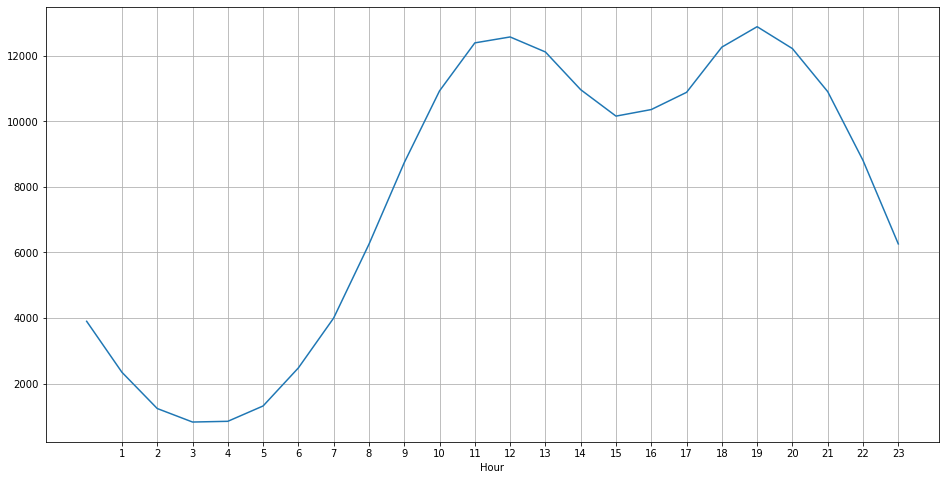

In [45]:
hours = [ _ for _ in range(1,24)]

plt.figure(figsize=(16, 8))
data.groupby("Hour")["Order ID"].count().plot()
plt.xticks(hours)
plt.xlabel("Hour")
plt.grid()

> This plot shows that the peak of purchases occurs between 11 AM and 1 PM, and then between 6 PM and 8 PM. It would be wise to run advertisements during these time slots to maximise sales.

#### 4. What products are most often sold together ?

Let's find all duplicates "Order Id" in the dataset. This means that two different products sold together.

In [49]:
data1 = data[data['Order ID'].duplicated(keep = False)]

In [50]:
data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Net Sales,City,Hour
11,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",January,700.00,New York City,7
12,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",January,11.99,New York City,7
65,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",January,11.95,Atlanta,11
66,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",January,600.00,Atlanta,11
79,148450,iPhone,1,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",January,700.00,Dallas,12


Let's create a new colummn that contains products with same 'Order ID'

In [55]:
data1['Grouped Products'] = data1.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

In [56]:
data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Net Sales,City,Hour,Grouped Products
11,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",January,700.00,New York City,7,"iPhone, Wired Headphones"
12,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",January,11.99,New York City,7,"iPhone, Wired Headphones"
65,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",January,11.95,Atlanta,11,"USB-C Charging Cable, Google Phone"
66,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",January,600.00,Atlanta,11,"USB-C Charging Cable, Google Phone"
79,148450,iPhone,1,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",January,700.00,Dallas,12,"iPhone, Lightning Charging Cable"


In [60]:
# Find all grouped products
grouped_products = data1[['Order ID', 'Grouped Products']].drop_duplicates()
grouped_products.head()

,Order ID,Grouped Products
11,144804,"iPhone, Wired Headphones"
65,148074,"USB-C Charging Cable, Google Phone"
79,148450,"iPhone, Lightning Charging Cable"
92,144679,"USB-C Charging Cable, Google Phone"
94,147451,"Google Phone, Wired Headphones"


In [62]:
# Count the combinations of 2 products sold together
from itertools import combinations
from collections import Counter

count = Counter()

for row in grouped_products['Grouped Products']:
    products_list = row.split(',')
    
    # Take the 2 most common products sold together
    count.update(Counter(combinations(products_list, 2))) 

count.most_common(10)

[(('iPhone', ' Lightning Charging Cable'), 495),
 (('Google Phone', ' USB-C Charging Cable'), 478),
 (('Lightning Charging Cable', ' iPhone'), 477),
 (('USB-C Charging Cable', ' Google Phone'), 468),
 (('Wired Headphones', ' iPhone'), 218),
 (('iPhone', ' Wired Headphones'), 217),
 (('Wired Headphones', ' Google Phone'), 209),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 189),
 (('iPhone', ' Apple Airpods Headphones'), 183),
 (('Google Phone', ' Wired Headphones'), 180)]

> iPhone and Lightning Charging Cable is most often sold together.